# Pymaceuticals Inc.
---

### Analysis
The two most effective drugs used in this experiment were Capomulin and Ramicane. I based this on the following points:
1. The two drugs had the lowest average tumor size throughout the length of the experiment. Keep in mind that this first mean takes in mind the tumor volume from the beginning to the end of the experiment. Therefore there is a flaw in this point alone but it does at least mean that on average, these two drugs had a lower tumor volume throughout the experiment.

2. The two drugs have the smallest average tumor volume. For the second part of the analysis we took four of the best performing drugs in the orginal general analysis (Capomulin, Ramicante, Infubinol, and Ceftamin) and looked at the final tumor volume for each individual mouse. Capomulin and Ceftamin still had the smallest average tumor volume at the end, meaning that they were the most effect in reducing tumors.

Additionally, the correlation coefficient between weight and average tumor volume was 0.84, meaning that there was a strong relationship between weight and average tumor volume. This makes sense as more mass in an organism means that there are more cells which could become cancerous and turn into a tumor. This assumption can be applied to humans as well, where humans with larger masses are more likely to develop tumors with larger masses than smaller humans.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
data_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
final_data=data_complete[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen","Sex","Age_months","Weight (g)"]]
final_data.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex,Age_months,Weight (g)
1888,r944,45,41.581521,Capomulin,Male,12,25
1889,u364,45,31.023923,Capomulin,Male,18,17
1890,p438,45,61.433892,Ceftamin,Female,11,26
1891,x773,45,58.634971,Placebo,Female,21,30
1892,b879,45,72.555239,Stelasyn,Female,4,26


In [2]:
# Checking the number of mice.
total_mice=final_data["Mouse ID"].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = final_data.loc[final_data["Mouse ID"] == "g989"]
duplicate_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,Propriva,Female,21,26
137,g989,0,45.000000,Propriva,Female,21,26
329,g989,5,48.786801,Propriva,Female,21,26
360,g989,5,47.570392,Propriva,Female,21,26
620,g989,10,51.745156,Propriva,Female,21,26
681,g989,10,49.880528,Propriva,Female,21,26
815,g989,15,51.325852,Propriva,Female,21,26
869,g989,15,53.442020,Propriva,Female,21,26
950,g989,20,55.326122,Propriva,Female,21,26
1111,g989,20,54.657650,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = final_data.loc[final_data["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,Propriva,Female,21,26
137,g989,0,45.000000,Propriva,Female,21,26
329,g989,5,48.786801,Propriva,Female,21,26
360,g989,5,47.570392,Propriva,Female,21,26
620,g989,10,51.745156,Propriva,Female,21,26
681,g989,10,49.880528,Propriva,Female,21,26
815,g989,15,51.325852,Propriva,Female,21,26
869,g989,15,53.442020,Propriva,Female,21,26
950,g989,20,55.326122,Propriva,Female,21,26
1111,g989,20,54.657650,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_drop=duplicate_data.index.tolist()
index_drop

#removed the added index columng
clean_data = final_data.drop(index_drop)
clean_data

#check_duplicate_data = clean_data.loc[final_data["Mouse ID"] == "g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,Capomulin,Female,9,22
1,f932,0,45.000000,Ketapril,Male,15,29
2,g107,0,45.000000,Ketapril,Female,2,29
3,a457,0,45.000000,Ketapril,Female,11,30
4,c819,0,45.000000,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
1888,r944,45,41.581521,Capomulin,Male,12,25
1889,u364,45,31.023923,Capomulin,Male,18,17
1890,p438,45,61.433892,Ceftamin,Female,11,26
1891,x773,45,58.634971,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
new_total_mice=clean_data['Mouse ID'].nunique()
new_total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean =clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median =clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance =clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sd =clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem =clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary=pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Standard Deviation":sd,"SEM":sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
clean_data.groupby(['Drug Regimen']).describe()
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

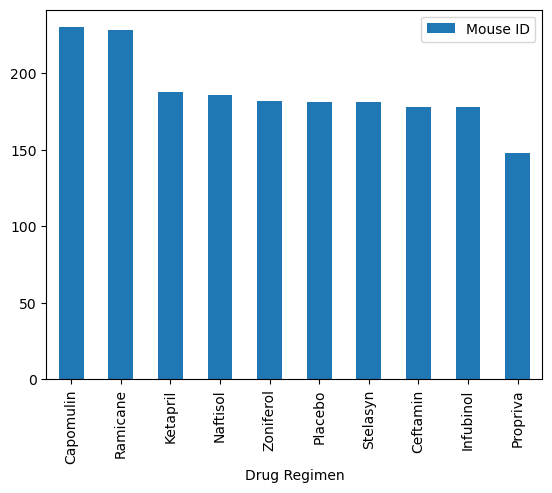

In [9]:
bar_data =clean_data.groupby('Drug Regimen')['Mouse ID'].count()
bar_chart_data = pd.DataFrame({"Mouse ID":bar_data})
bar_chart_data=bar_chart_data.sort_values(['Mouse ID'], ascending=[False])
bar_chart_data

bar_chart_data.plot(kind="bar")


<BarContainer object of 10 artists>

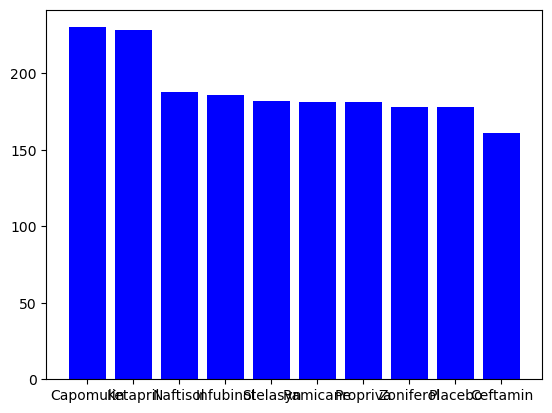

In [10]:
x_axis=final_data['Drug Regimen'].unique()

y_axis=final_data['Drug Regimen'].value_counts()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis,y_axis, color='b', alpha=1, align="center") 


<Axes: ylabel='Size'>

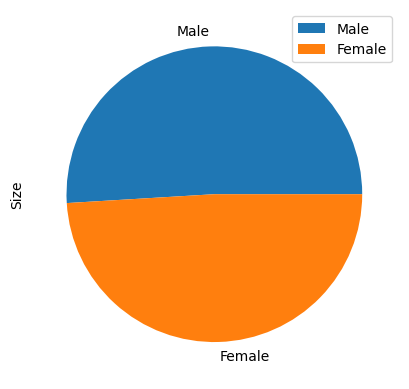

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data =clean_data['Sex'].value_counts()
sex_data_pd=pd.DataFrame({"Size":sex_data})
sex_data_pd.plot.pie(y="Size")


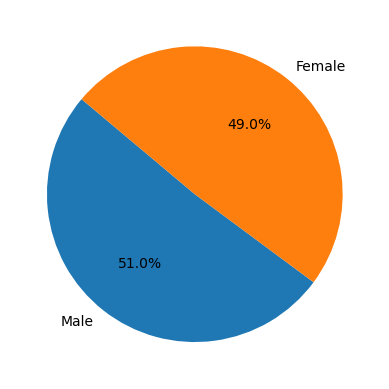

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Male','Female']

sizes=clean_data['Sex'].value_counts()
sizes


plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
new_data=final_data.groupby('Mouse ID')["Timepoint"].max()
new_data

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_processed = pd.merge(new_data, final_data, how="left", on=["Mouse ID", "Timepoint"])
data_processed.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,Infubinol,Female,20,23
1,a251,45,65.525743,Infubinol,Female,21,25
2,a262,45,70.717621,Placebo,Female,17,29
3,a275,45,62.999356,Ceftamin,Female,20,28
4,a366,30,63.440686,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume=data_processed.loc[data_processed["Drug Regimen"]==i, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_data.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles=final_tumor_volume.quantile([.25,.5,.75])
    
    upperq,lowerq=quartiles[.75],quartiles[.25]
    
    iqr= upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    potential_outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    
    print(f"{i}'s potential outliers: {potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


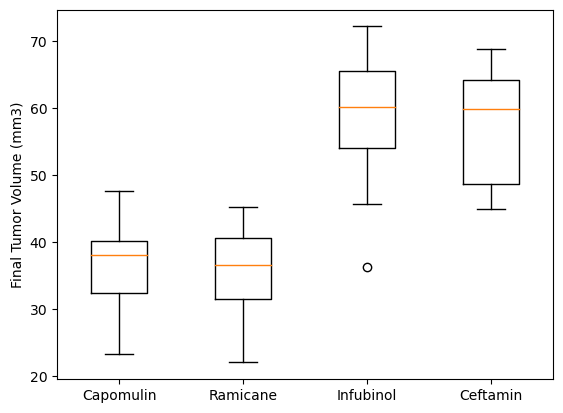

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_data)

ax1.set_xticklabels(treatments)

# Rotate the tick labels if needed for better readability (optional)
plt.xticks()

# Add labels and title to the plot
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

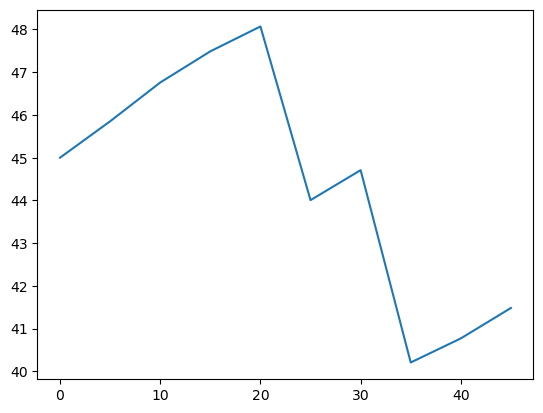

In [16]:
specific_data = clean_data.loc[final_data["Mouse ID"] == "l509"]

plt.plot(specific_data["Timepoint"], specific_data["Tumor Volume (mm3)"])
# Show the graph that we have created
plt.show()

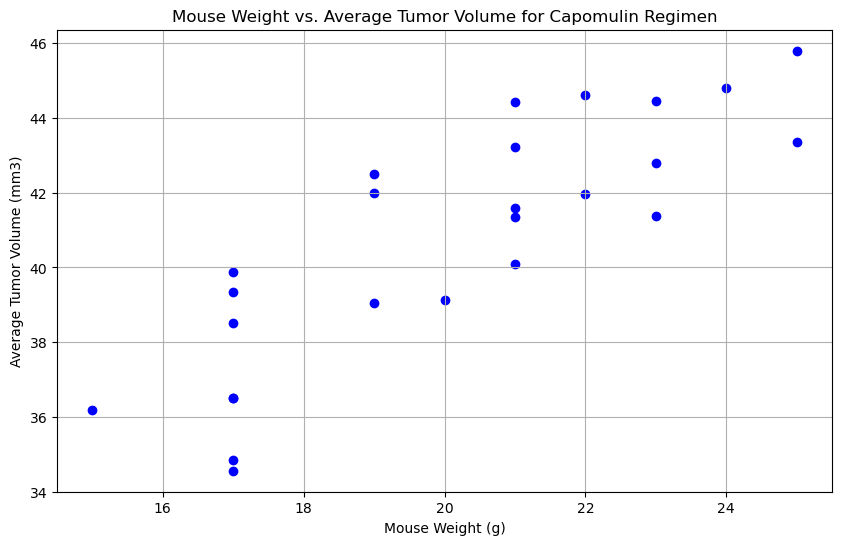

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each weight group
import matplotlib.pyplot as plt

# Group the data by Mouse ID and Weight, then calculate the average tumor volume
average_tumor_by_mouse = capomulin_data.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()

# Convert the grouped data back to a DataFrame
average_tumor_df = average_tumor_by_mouse.reset_index()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_df['Weight (g)'], average_tumor_df['Tumor Volume (mm3)'], color='blue')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


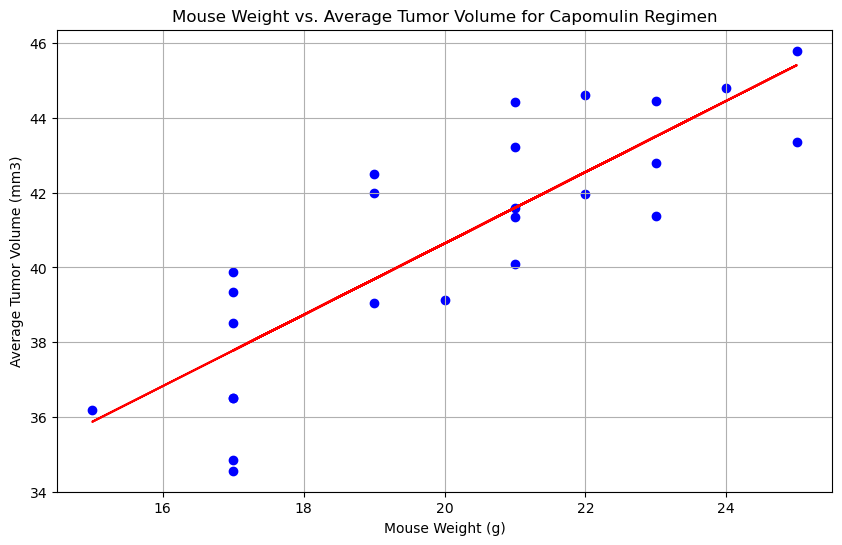

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept = np.polyfit(average_tumor_df['Weight (g)'], average_tumor_df['Tumor Volume (mm3)'], 1)
regression_line = slope * average_tumor_df['Weight (g)'] + intercept

plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_df['Weight (g)'], average_tumor_df['Tumor Volume (mm3)'], color='blue')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

plt.plot(average_tumor_df['Weight (g)'], regression_line, color='red')

correlation_coefficient = np.corrcoef(average_tumor_df['Weight (g)'], average_tumor_df['Tumor Volume (mm3)'])[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")
